
### Context

What is Engineering?

Engineering is the use of scientific principles to design and build machines, structures, and other items, including bridges, tunnels, roads, vehicles, and buildings. The discipline of engineering encompasses a broad range of more specialized fields of engineering, each with a more specific emphasis on particular areas of applied mathematics, applied science, and types of application.
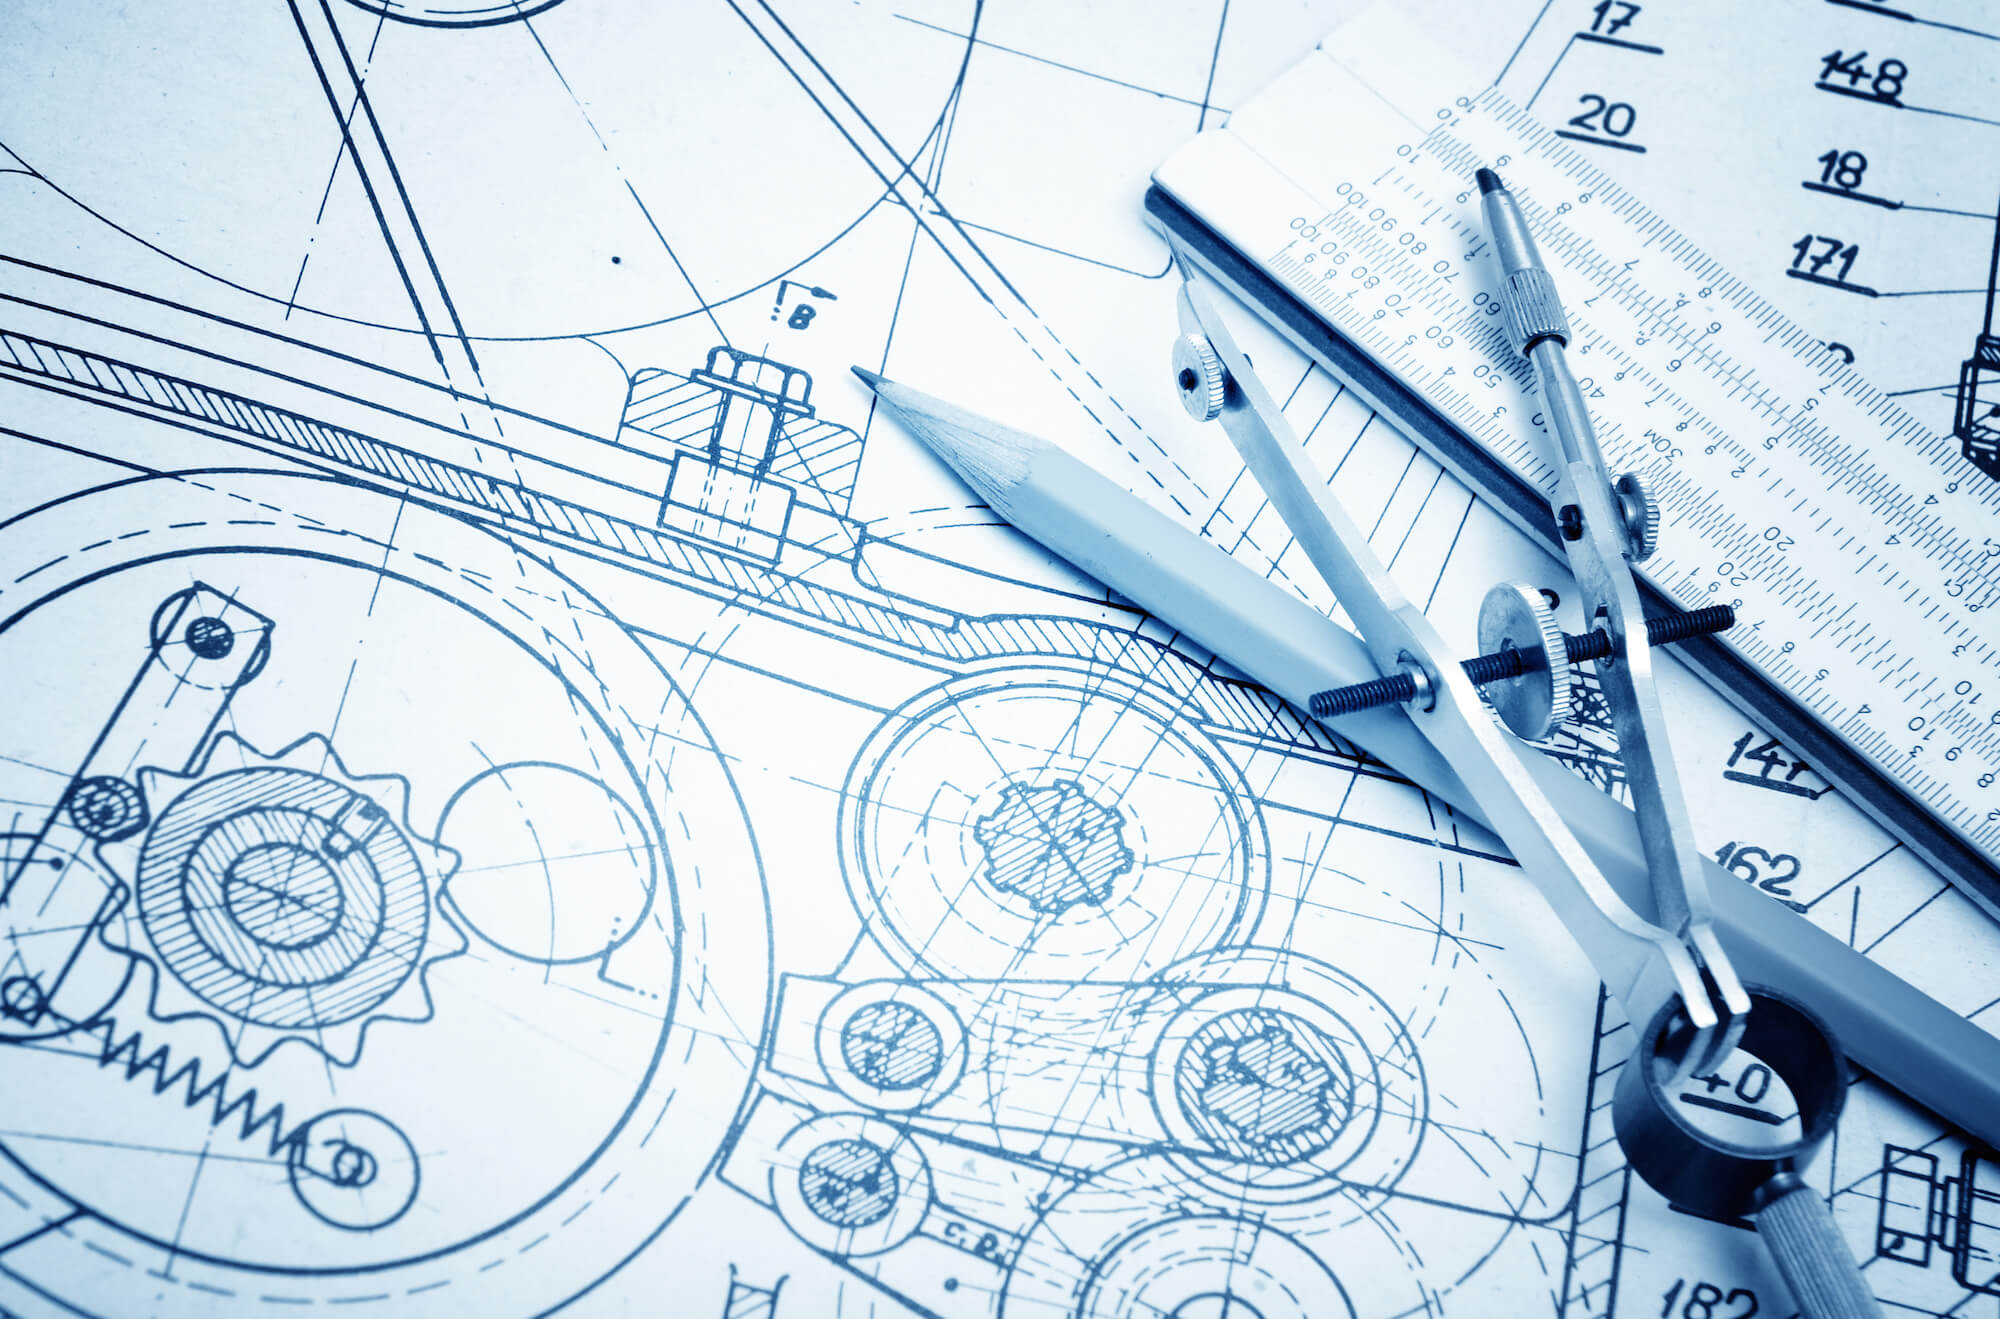
 

Engineering is a broad discipline that is often broken down into several sub-disciplines. Although an engineer will usually be trained in a specific discipline, he or she may become multi-disciplined through experience. Engineering is often characterized as having four main branches: chemical engineering, civil engineering, electrical engineering, and mechanical engineering. [Reference: Wikipedia]

Engineering Graduates in India

India has a total 6,214 Engineering and Technology Institutions in which around 2.9 million students are enrolled. Every year on an average 1.5 million students get their degree in engineering, but due to lack of skill required to perform technical jobs less than 20 percent get employment in their core domain. [source of information: BWEDUCATION]

#### Objective
A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.



#### Evaluation Criteria
Submissions are evaluated using Root-Mean-Squared-Error (RMSE).
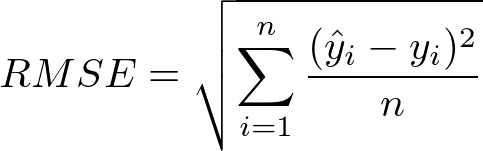



### About the dataset
The dataset contains 33 attributes. The target variable refers to the salary of an Engineering Graduate in India. 

To load the training data in your jupyter notebook, use the below command:

import pandas as pd

eng_grad_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/training_set_label.csv" )

#### Data Description
- ID: A unique ID to identify a candidate
- Salary: Annual CTC offered to the candidate (in INR)
- Gender: Candidate's gender
- DOB: Date of birth of the candidate
- 10percentage: Overall marks obtained in grade 10 examinations
- 10board: The school board whose curriculum the candidate followed in grade 10
- 12graduation: Year of graduation - senior year high school
- 12percentage: Overall marks obtained in grade 12 examinations
- 12board: The school board whose curriculum the candidate followed
- CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
- CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
- Degree: Degree obtained/pursued by the candidate
- Specialization: Specialization pursued by the candidate
- CollegeGPA: Aggregate GPA at graduation
- CollegeCityID: A unique ID to identify the city in which the college is located in.
- CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
-  CollegeState: Name of the state in which the college is located
- GraduationYear: Year of graduation (Bachelor's degree)
- English: Scores in AMCAT English section
- Logical: Score in AMCAT Logical ability section
- Quant: Score in AMCAT's Quantitative ability section
- Domain: Scores in AMCAT's domain module
- ComputerProgramming: Score in AMCAT's Computer programming section
- ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
- ComputerScience: Score in AMCAT's Computer Science section
- MechanicalEngg: Score in AMCAT's Mechanical Engineering section
- ElectricalEngg: Score in AMCAT's Electrical Engineering section
- TelecomEngg: Score in AMCAT's Telecommunication Engineering section
- CivilEngg: Score in AMCAT's Civil Engineering section
- conscientiousness: Scores in one of the sections of AMCAT's personality test
- agreeableness: Scores in one of the sections of AMCAT's personality test
- extraversion: Scores in one of the sections of AMCAT's personality test
- nueroticism: Scores in one of the sections of AMCAT's personality test
- openess_to_experience: Scores in one of the sections of AMCAT's personality test
Note: To give you more context AMCAT is a job portal.

Test Dataset
Load the test data (name it as test_data). You can load the data using the below command.

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/testing_set_label.csv')

Here the target column is deliberately not there as you need to predict it.



In [1]:
#libraries to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale
import sweetviz as sv
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
eng_grad_train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/training_set_label.csv" )
holdout_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/testing_set_label.csv')

In [3]:
eng_grad_train_data.head()

ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier       Degree                           Specialization  \
0            1  B.Tech/B.E.  instrumentation and control engineering   
1            2  B.Tech/B.E.           computer science & engineering   
2            2  B.Tech/B.E.         electronics & telecommunications   
3            1  B.Tech/B.E.           computer science & engineering   
4            2  B.Tech/B.E.                            biotechnology   

   collegeGPA  CollegeCityID  CollegeCityTier   CollegeState  GraduationYear  \
0       73.82           6920                1          Delhi            2013   
1       65.00           6624                0  Uttar Pradesh            2014   
2       61.94           9084                0    Maharashtra            2011   
3       80.40           8195                1          Delhi            2013   
4       64.30           4889                1     Tamil Nadu            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      650      665    810  0.694479                  485   
1      440      435    210  0.342315                  365   
2      485      475    505  0.824666                   -1   
3      675      620    635  0.990009                  655   
4      575      495    365  0.278457                  315   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                    366               -1              -1              -1   
1                     -1               -1              -1              -1   
2                    400               -1              -1              -1   
3                     -1               -1              -1              -1   
4                     -1               -1              -1              -1   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0           -1         -1            -0.1590         0.3789        1.2396   
1           -1         -1             1.1336         0.0459        1.2396   
2          260         -1             0.5100        -0.1232        1.5428   
3           -1         -1            -0.4463         0.2124        0.3174   
4           -1         -1            -1.4992        -0.7473       -1.0697   

   nueroticism  openess_to_experience  Salary  
0      0.14590                 0.2889  445000  
1      0.52620                -0.2859  110000  
2     -0.29020                -0.2875  255000  
3      0.27270                 0.4805  420000  
4      0.06223                 0.1864  200000

In [4]:
#to visualize the data
my_report = sv.analyze(holdout_data)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
eng_grad_train_data.shape
holdout_data.shape

(1000, 33)

In [6]:
eng_grad_train_data['birth_year']=eng_grad_train_data['DOB'].str.split('-').str[0]
holdout_data['birth_year']=holdout_data['DOB'].str.split('-').str[0]

In [7]:
eng_grad_train_data['birth_year']=eng_grad_train_data['birth_year'].astype('category')
holdout_data['birth_year']=holdout_data['birth_year'].astype('category')
eng_grad_train_data['CollegeTier']=eng_grad_train_data['CollegeTier'].astype('category')
holdout_data['CollegeTier']=holdout_data['CollegeTier'].astype('category')
eng_grad_train_data['GraduationYear']=eng_grad_train_data['GraduationYear'].astype('category')
holdout_data['GraduationYear']=holdout_data['GraduationYear'].astype('category')

In [8]:
holdout_data.describe(include='all')

ID Gender         DOB  10percentage 10board  12graduation  \
count   1.000000e+03   1000        1000   1000.000000    1000   1000.000000   
unique           NaN      2         786           NaN     106           NaN   
top              NaN      m  1991-01-01           NaN    cbse           NaN   
freq             NaN    759           6           NaN     369           NaN   
mean    6.605026e+05    NaN         NaN     78.702460     NaN   2008.108000   
std     3.583048e+05    NaN         NaN      9.339532     NaN      1.717931   
min     1.603700e+04    NaN         NaN     48.000000     NaN   1995.000000   
25%     3.367995e+05    NaN         NaN     72.532500     NaN   2007.000000   
50%     6.389995e+05    NaN         NaN     80.000000     NaN   2008.000000   
75%     9.833408e+05    NaN         NaN     86.000000     NaN   2009.000000   
max     1.298275e+06    NaN         NaN     95.860000     NaN   2013.000000   

        12percentage 12board     CollegeID  CollegeTier       Degree  \
count    1000.000000    1000   1000.000000       1000.0         1000   
unique           NaN     118           NaN          2.0            4   
top              NaN    cbse           NaN          2.0  B.Tech/B.E.   
freq             NaN     361           NaN        929.0          943   
mean       74.842030     NaN   4996.880000          NaN          NaN   
std        10.627497     NaN   4877.271717          NaN          NaN   
min        45.000000     NaN     13.000000          NaN          NaN   
25%        67.000000     NaN    439.000000          NaN          NaN   
50%        75.000000     NaN   3579.000000          NaN          NaN   
75%        82.425000     NaN   8350.250000          NaN          NaN   
max        97.900000     NaN  18103.000000          NaN          NaN   

                                   Specialization   collegeGPA  CollegeCityID  \
count                                        1000  1000.000000    1000.000000   
unique                                         31          NaN            NaN   
top     electronics and communication engineering          NaN            NaN   
freq                                          210          NaN            NaN   
mean                                          NaN    71.415160    4996.880000   
std                                           NaN     8.304125    4877.271717   
min                                           NaN     6.450000      13.000000   
25%                                           NaN    66.000000     439.000000   
50%                                           NaN    71.515000    3579.000000   
75%                                           NaN    76.412500    8350.250000   
max                                           NaN    96.000000   18103.000000   

        CollegeCityTier   CollegeState  GraduationYear      English  \
count       1000.000000           1000          1000.0  1000.000000   
unique              NaN             22             9.0          NaN   
top                 NaN  Uttar Pradesh          2013.0          NaN   
freq                NaN            217           297.0          NaN   
mean           0.313000            NaN             NaN   503.396000   
std            0.463946            NaN             NaN   103.872329   
min            0.000000            NaN             NaN   225.000000   
25%            0.000000            NaN             NaN   425.000000   
50%            0.000000            NaN             NaN   500.000000   
75%            1.000000            NaN             NaN   575.000000   
max            1.000000            NaN             NaN   850.000000   

            Logical        Quant       Domain  ComputerProgramming  \
count   1000.000000  1000.000000  1000.000000          1000.000000   
unique          NaN          NaN          NaN                  NaN   
top             NaN          NaN          NaN                  NaN   
freq            NaN          NaN          NaN                  NaN   
mean     505.098000   511.10

In [9]:
eng_grad_train_data['10board']=eng_grad_train_data['10board'].astype('category').cat.codes
holdout_data['10board']=holdout_data['10board'].astype('category').cat.codes

In [10]:
eng_grad_train_data.drop(columns=['DOB','12board'],inplace=True)
holdout_data.drop(columns=['DOB','12board'],inplace=True)

In [11]:
eng_grad_train_data.info()
holdout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     2998 non-null   int64   
 1   Gender                 2998 non-null   object  
 2   10percentage           2998 non-null   float64 
 3   10board                2998 non-null   int16   
 4   12graduation           2998 non-null   int64   
 5   12percentage           2998 non-null   float64 
 6   CollegeID              2998 non-null   int64   
 7   CollegeTier            2998 non-null   category
 8   Degree                 2998 non-null   object  
 9   Specialization         2998 non-null   object  
 10  collegeGPA             2998 non-null   float64 
 11  CollegeCityID          2998 non-null   int64   
 12  CollegeCityTier        2998 non-null   int64   
 13  CollegeState           2998 non-null   object  
 14  GraduationYear         2998 non-null   c

In [12]:
eng_grad_train_data['Specialization']=eng_grad_train_data['Specialization'].str.replace('electronics & instrumentation eng',
                                                                                     'electronics and instrumentation engineering'  )
holdout_data['Specialization']=holdout_data['Specialization'].str.replace('electronics & instrumentation eng',
                                                                                     'electronics and instrumentation engineering'  )

In [13]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    del df[column_name]
    return df
for col in eng_grad_train_data.select_dtypes(include=['object']).columns:
    eng_grad_train_data[col]=eng_grad_train_data[col].str.lower().str.strip()
    holdout_data[col]=holdout_data[col].str.lower().str.strip()
    eng_grad_train_data=create_dummies(eng_grad_train_data,col)
    holdout_data=create_dummies(holdout_data,col)
for col in eng_grad_train_data.select_dtypes(include=['category']).columns:
    eng_grad_train_data=create_dummies(eng_grad_train_data,col)
    holdout_data=create_dummies(holdout_data,col)

In [14]:
X=eng_grad_train_data.drop(columns=['Salary'])
Y=eng_grad_train_data.Salary
print(X.shape)

(2998, 127)


In [15]:
X.shape

(2998, 127)

In [16]:
holdout_data.columns

Index(['ID', '10percentage', '10board', '12graduation', '12percentage',
       'CollegeID', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'English',
       ...
       'birth_year_1985', 'birth_year_1986', 'birth_year_1987',
       'birth_year_1988', 'birth_year_1989', 'birth_year_1990',
       'birth_year_1991', 'birth_year_1992', 'birth_year_1993',
       'birth_year_1994'],
      dtype='object', length=108)

In [17]:
X.columns

Index(['ID', '10percentage', '10board', '12graduation', '12percentage',
       'CollegeID', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'English',
       ...
       'birth_year_1987', 'birth_year_1988', 'birth_year_1989',
       'birth_year_1990', 'birth_year_1991', 'birth_year_1992',
       'birth_year_1993', 'birth_year_1994', 'birth_year_1995',
       'birth_year_1997'],
      dtype='object', length=127)

In [18]:
X=X.drop(columns=['CollegeState_assam'
,'CollegeState_goa',
'CollegeState_union territory',
'CollegeState_meghalaya',
                 'Specialization_aeronautical engineering','Specialization_biomedical engineering','Specialization_ceramic engineering',
                 'Specialization_computer and communication engineering','Specialization_computer networking','Specialization_control and instrumentation engineering',
                 'Specialization_embedded systems technology','Specialization_industrial & management engineering','Specialization_industrial engineering',
                 'Specialization_information science', 'Specialization_mechanical & production engineering',
       'Specialization_mechanical and automation',
       'Specialization_mechanical engineering','GraduationYear_0','GraduationYear_2007','birth_year_1981','birth_year_1995',
'birth_year_1997'])
holdout_data=holdout_data.drop(columns=['Specialization_polymer technology',
       'Specialization_power systems and automation','birth_year_1977'])

In [19]:
holdout_data.shape

(1000, 105)

In [20]:
X.head()

ID  10percentage  10board  12graduation  12percentage  CollegeID  \
0  604399         87.80       46          2009         84.00       6920   
1  988334         57.00       46          2010         64.50       6624   
2  301647         77.33      129          2007         85.17       9084   
3  582313         84.30       46          2009         86.00       8195   
4  339001         82.00       46          2008         75.00       4889   

   collegeGPA  CollegeCityID  CollegeCityTier  English  Logical  Quant  \
0       73.82           6920                1      650      665    810   
1       65.00           6624                0      440      435    210   
2       61.94           9084                0      485      475    505   
3       80.40           8195                1      675      620    635   
4       64.30           4889                1      575      495    365   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.694479                  485                    366               -1   
1  0.342315                  365                     -1               -1   
2  0.824666                   -1                    400               -1   
3  0.990009                  655                     -1               -1   
4  0.278457                  315                     -1               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1            -0.1590   
1              -1              -1           -1         -1             1.1336   
2              -1              -1          260         -1             0.5100   
3              -1              -1           -1         -1            -0.4463   
4              -1              -1           -1         -1            -1.4992   

   agreeableness  extraversion  nueroticism  openess_to_experience  Gender_f  \
0         0.3789        1.2396      0.14590                 0.2889         1   
1         0.0459        1.2396      0.52620                -0.2859         0   
2        -0.1232        1.5428     -0.29020                -0.2875         0   
3         0.2124        0.3174      0.27270                 0.4805         0   
4        -0.7473       -1.0697      0.06223                 0.1864         1   

   Gender_m  Degree_b.tech/b.e.  Degree_m.sc. (tech.)  Degree_m.tech./m.e.  \
0         0                   1                     0                    0   
1         1                   1                     0                    0   
2         1                   1                     0                    0   
3         1                   1                     0                    0   
4         0                   1                     0                    0   

   Degree_mca  Specialization_applied electronics and instrumentation  \
0           0                                                  0        
1           0                                                  0        
2           0                                                  0        
3           0                                                  0        
4           0                                                  0        

   Specialization_automobile/automotive engineering  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Specialization_biotechnology  Specialization_chemical engineering  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             1                                    0   

   Specialization_ci

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
holdout_data=pd.DataFrame(scaler.fit_transform(holdout_data),columns=holdout_data.columns)
# from sklearn.preprocessing import minmax_scale
# for col in eng_grad_train_data.columns:
#     eng_grad_train_data[col+"scaled"]=minmax_scale(eng_grad_train_data[col])
#     #holdout_data[col+"scaled"]=minmax_scale(holdout_data[col])
# for col in holdout_data.columns:
#     holdout_data[col+"scaled"]=minmax_scale(holdout_data[col])
    

In [22]:
holdout_data.head()

ID  10percentage   10board  12graduation  12percentage  CollegeID  \
0 -1.174447      1.510203 -1.443601     -0.645285      1.300860  -0.642254   
1  0.804629     -0.396627 -0.263249      1.101876     -0.667662   1.684595   
2 -0.755108      0.053299 -0.014754     -0.062898     -1.491410   0.323728   
3 -0.222795      0.481800 -0.729177      0.519489      0.523242   0.656047   
4 -0.906404      0.717476 -1.443601     -0.062898      1.304626  -0.790977   

   collegeGPA  CollegeCityID  CollegeCityTier   English   Logical     Quant  \
0    1.531914      -0.642254         1.481516 -1.429353 -0.001151  0.847495   
1    0.178897       1.684595        -0.674985 -0.851432 -2.644461 -1.191733   
2    0.190945       0.323728         1.481516 -1.044072 -0.001151 -1.444598   
3    0.287331       0.656047         1.481516  0.978652  1.232393  0.398865   
4   -1.134360      -0.790977        -0.674985 -0.466151 -0.940995  0.276511   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.636339             0.328222               1.961353        -0.487925   
1  0.815475            -0.345577              -0.597469         2.510178   
2  0.019293             0.280093              -0.597469        -0.487925   
3  0.674462             0.761378              -0.597469        -0.487925   
4  0.045038            -1.722052               1.533819        -0.487925   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0       -0.220559       -0.196819     4.039727  -0.124251          -1.110873   
1       -0.220559       -0.196819    -0.324042  -0.124251          -0.809905   
2       -0.220559       -0.196819    -0.324042  -0.124251           1.416429   
3       -0.220559       -0.196819    -0.324042  -0.124251          -1.224276   
4       -0.220559       -0.196819     2.318156  -0.124251           0.747451   

   agreeableness  extraversion  nueroticism  openess_to_experience  Gender_f  \
0      -0.717486     -2.316866     2.325440              -0.156689 -0.563492   
1      -0.737919      0.641576     0.132143               0.792626 -0.563492   
2       0.327717     -0.455505     0.898558               0.780952 -0.563492   
3       0.935232     -0.029487     0.645279              -0.344751  1.774649   
4       1.895354     -0.099016     0.244566              -0.156689 -0.563492   

   Gender_m  Degree_b.tech/b.e.  Degree_m.sc. (tech.)  Degree_m.tech./m.e.  \
0  0.563492            0.245856             -0.031639            -0.114766   
1  0.563492            0.245856             -0.031639            -0.114766   
2  0.563492           -4.067414             -0.031639             8.713385   
3 -1.774649            0.245856             -0.031639            -0.114766   
4  0.563492            0.245856             -0.031639            -0.114766   

   Degree_mca  Specialization_applied electronics and instrumentation  \
0   -0.211972                                          -0.063372        
1   -0.211972                                          -0.063372        
2   -0.211972                                          -0.063372        
3   -0.211972                                          -0.063372        
4   -0.211972                                          -0.063372        

   Specialization_automobile/automotive engineering  \
0                                         -0.031639   
1                                         -0.031639   
2                                         -0.031639   
3                                         -0.031639   
4                                         -0.031639   

   Specialization_biotechnology  Specialization_chemical engineering  \
0                     -0.054855                            -0.044766   
1                     -0.054855                            -0.044766   
2                     -0.054855                            -0.044766   
3                     -0.054855                            -0.044766   
4                     -0.054855                

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.11, 
                                                    random_state=11)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
rg=Ridge(max_iter=2000,random_state=21,alpha=0.75,normalize=True,solver='sparse_cg')
rg.fit(X_train,y_train)
prediction=rg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,prediction))
rmse



137358.50880536312

In [25]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= rg , step = 1) 
# estimator rg is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 52
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True  True  True False False False False False False  True False False
 False  True False False False False False False  True False False False
 False  True False False False  True False False False False False False
  True False  True False False False False  True  True  True False False
 False  True  True  True  True False False False  True  True  True False
  True  True False  True  True  True False False False  True  True False
  True  True False False False  True False False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11  1  1  1  8  1
  1  1  1 36 19 40 18 22 15  1 45 33  5  1 20 43 30  7  2 32  1 26 25 38
 54  1 52 17 50  1 34  4 21 13 49 48  1 35  1 47  9 39 10  1  1  1  3 12
 51  1  1  1  1 42 16 24  1  1  1 14  1  1 23  1  1  1 27  6 53  1  1 31
  1  1 44 29 46

In [26]:
pd.set_option('display.max_rows', 500)
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
0                                                   ID        1
101                                    birth_year_1991        1
82                                       CollegeTier_2        1
37                 Specialization_computer engineering        1
81                                       CollegeTier_1        1
80                            CollegeState_west bengal        1
85                                 GraduationYear_2011        1
44   Specialization_electronics and communication e...        1
87                                 GraduationYear_2013        1
97                                     birth_year_1987        1
96                                     birth_year_1986        1
49   Specialization_industrial & production enginee...        1
33                        Specialization_biotechnology        1
76                             CollegeState_tamil nadu        1
53   Specialization_instrumentation and control eng...        1
75                                 CollegeState_sikkim        1
93                                     birth_year_1983        1
60                                  CollegeState_bihar        1
74                              CollegeState_rajasthan        1
62                                  CollegeState_delhi        1
73                                 CollegeState_punjab        1
89                                 GraduationYear_2015        1
67                              CollegeState_jharkhand        1
68                              CollegeState_karnataka        1
69                                 CollegeState_kerala        1
94                                     birth_year_1984        1
84                                 GraduationYear_2010        1
88                                 GraduationYear_2014        1
13                                 ComputerProgramming        1
12                                              Domain        1
26                                            Gender_m        1
14                               ElectronicsAndSemicon        1
15                                     ComputerScience        1
16                                      MechanicalEngg        1
17                                      ElectricalEngg        1
9                                              English        1
8                                      CollegeCityTier        1
19                                           CivilEngg        1
11                                               Quant        1
20                                   conscientiousness        1
7                                        CollegeCityID        1
6                                           collegeGPA        1
5                                            CollegeID        1
4                                         12percentage        1
23                                         nueroticism        1
24                               openess_to_experience        1
25                                            Gender_f        1
3                                         12graduation        1
2                                              10board        1
1                                         10percentage        1
21                                       agreeableness        1
10                                             Logical        1
42                          Specialization_electronics        2
70                         CollegeState_madhya pradesh        3
55                         Specialization_mechatronics        4
36                 Specialization_computer application        5
91                                 GraduationYear_2017        6
41               Specialization_electrical engineering        7
22                                        extraversion        8
64                                CollegeState_haryana        9
66                      CollegeState_jammu and kashmir       10
18                                         TelecomEngg       11
71             

In [27]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
holdout_rfe = rfe.transform(holdout_data)

# Fitting our baseline model with the transformed data
lr_rfe_model = rg.fit(X_train_rfe, y_train)

In [28]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rfe))
rmse


137346.99400093584

In [29]:
prediction = lr_rfe_model.predict(holdout_rfe)
res = pd.DataFrame(prediction) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = holdout_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission3.csv",index=False)

Link for the challenge: https://dphi.tech/challenges/data-sprint-2-engineering-graduates-employment-outcomes/20/overview/about